Blatt 3 - Programmieraufgaben

Aufgabe 1)
b)

Aus dem Skript erhalten wir die Formel zur experimentellen Berechnung:

$x \bigoplus y = x für |y| \leq \ \frac{|x|}{b}eps$

Wir setzen x=1 und b=2, da wir mit dem Binärsystem arbeiten

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

y = 1.0
x = 1.0

#Die Schleife läuft so lange, bis y+x=1
while y + x > 1:
    y /=2
#Da ab einem y von 1/2 eps x+y=x gilt und wir dieses y gerade berechnet haben gilt:
eps = 2*y
print(eps)
#richtig 1.5P

2.220446049250313e-16


Aufgabe 4)

Newton-Darstellung:

p(x)=$\sum_{i=0}^{n} y[x_{0},...,x_{n}] N_{i}(x)$

a)
Die zu berechnenden Koeffizienten $C_{i}$ sind hierbei demenstprechend die dividierten Differenzen $y[x_{0},...,x_{n}]$

Diese sind rekursiv definiert als:

$i=0,...,n: y[x_{i}]:=y_{i}$

$k=1,...,n-1: y[x_{i},...,x_{i+k}] := \frac {y[x_{i+1},...,x_{i+k}]-y[x_{i},...,x_{i+k-1}]} {x_{i+k}-x_{i}}$

In [2]:
#Stützstellen
x=np.array([0,1,2,3])
y=np.array([-6,2,1,3])


def NewtonCoeff(x,y):
    c = np.zeros(len(x))

    for i in range(len(x)):
        c[i] = y[i]  # c0 = y0

        for j in range(i):
            c[i] = (c[i]-c[j])/(x[i]-x[j]) 

    return c

c=NewtonCoeff(x,y)
print(c)

[-6.   8.  -4.5  2. ]


b)

Um die Newton Darstellung auszuwerten, brauchen wir neben unseren oben berechneten Koeffizienten auch die Newton-Basispolynome $N_{i}(x)$
Diese werden folgenderweise Berechnet:

$N_{0}(x)=1$

$N_{i}(x):= \prod_{j=0}^{i-1} (x-x_{j}) : i=1,..,n$

In [3]:
z=np.array([0,0.5,1,1.5,2,2.5,3,3.5])


def calcNewtonBP(j,z,x): #Berechnung des Newton Basispolynoms N_j
    nx=1
    for i in range(0,j):
        nx *= (z-x[i])
    return nx

def evalNewtonCoeff(c,x,z):
    p=np.zeros(len(z))
    for i in range(0,len(z)):
        #Werte für p_i berechnen
        p[i]= c[0] #mit c0 anfangen, da für N_0 = c0
        for j in range(1,len(x)): #für alle anderen c_i,...,c_n
            p[i] += c[j]*calcNewtonBP(j,z[i],x)
    return p

p=evalNewtonCoeff(c,x,z)

print(p)



[-6.    -0.125  2.     1.875  1.     0.875  3.     8.875]


c)
i)$[a,b]=[0,2\pi], f(x)=\sin(x)$

ii)$[a,b]=[0,2], f(x)=\exp(x)$

iii)$[a,b]=[-1,1], f(x)=\frac{1}{1+(5x)^{2}}$



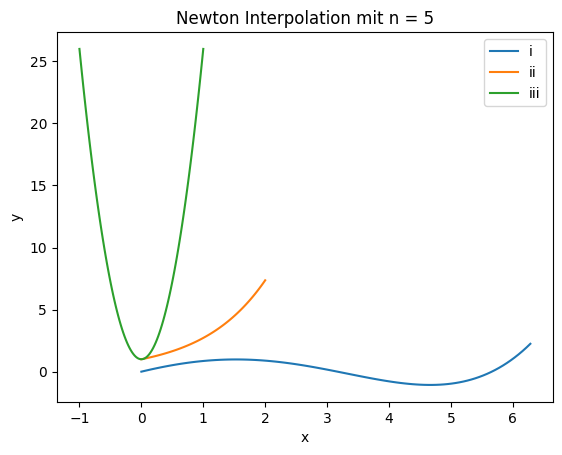

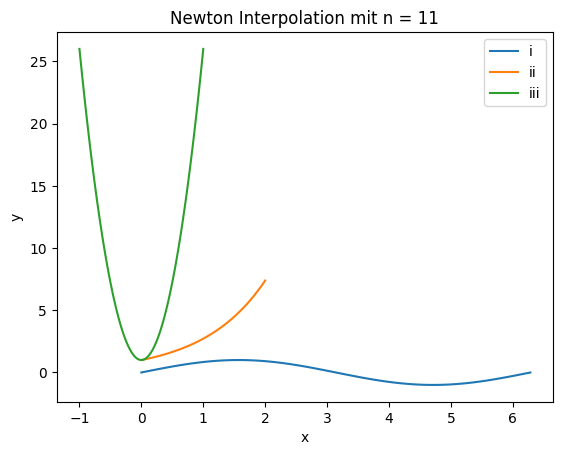

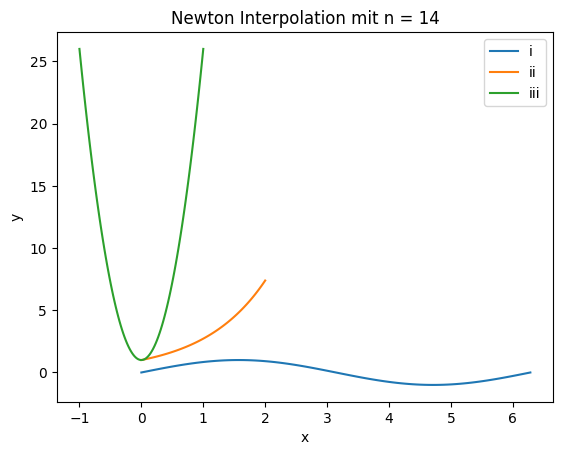

In [4]:
def createX(a,b,n):
    x = np.zeros(n)
    for i in range(n):
        x[i] = a + (i/n)*(b-a)
    return x

def iii_f(x):
    return 1/1+(5*x)**2 #funktion falsch definiert

def plot(n):
    #Definition der Stützstellen und der Funktionswerte für i, ii und iii
    i_z = np.linspace(0,2*math.pi,100)
    i_x = createX(0,2*math.pi,n)
    i_y = np.sin(i_x)
    i_c = NewtonCoeff(i_x,i_y)
    i_p = evalNewtonCoeff(i_c,i_x,i_z)


    ii_z = np.linspace(0,2,100)
    ii_x=createX(0,2,n)
    ii_y=np.exp(ii_x)
    ii_c=NewtonCoeff(ii_x,ii_y)
    ii_p=evalNewtonCoeff(ii_c,ii_x,ii_z)

    iii_z = np.linspace(-1,1,100)
    iii_x = createX(-1,1,n)
    iii_y = iii_f(iii_x)
    iii_c = NewtonCoeff(iii_x,iii_y)
    iii_p = evalNewtonCoeff(iii_c,iii_x,iii_z)

    plt.title("Newton Interpolation mit n = "+str(n))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(i_z,i_p,label="i")
    plt.plot(ii_z, ii_p, label="ii")
    plt.plot(iii_z,iii_p,label="iii")
    plt.legend()
    plt.show() 

plot(5)
plot(11)
plot(14)

In [ ]:
#Hier ist was beim plotten falsch gelaufen 4.5P